# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
!pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['tilichiki', 'bam', 'satitoa', 'esperance', 'castro', 'chokurdakh', 'new norfolk', 'torrington', 'lompoc', 'hofn', 'albany', 'hobyo', 'fairbanks', 'taolanaro', 'tsihombe', 'norman wells', 'elsterwerda', 'rapid valley', 'punta arenas', 'rikitea', 'thompson', 'nikolskoye', 'tucuman', 'arraial do cabo', 'porto uniao', 'gambo', 'hermanus', 'ushuaia', 'cockburn harbour', 'kahului', 'katherine', 'bridlington', 'cayenne', 'gainesville', 'busselton', 'cape town', 'kodiak', 'puerto baquerizo moreno', 'yellowknife', 'yenagoa', 'girvan', 'obodivka', 'avarua', 'amga', 'atuona', 'anloga', 'tuktoyaktuk', 'loiza', 'kapaa', 'khilok', 'ribeira grande', 'ilhabela', 'buala', 'boende', 'saleaula', 'qaanaaq', 'upernavik', 'butaritari', 'port alfred', 'bredasdorp', 'zemaiciu naumiestis', 'batagay-alyta', 'camacha', 'san jeronimo', 'jamestown', 'mataura', 'amderma', 'makakilo city', 'misratah', 'abu dhabi', 'saint-philippe', 'vaini', 'bom sucesso', 'belushya guba', 'guasdualito', 'cabo san lucas', 'ouallam'

In [7]:
#make the temperatures fahrenheit using API documentation
units = "imperial"
#create empty lists for the different statistics
temperatures = []
humidities = []
cloudiness = []
country = []
date = []
windspeed = []
longitude = []
latitude = []
cities_x = []
url = "http://api.openweathermap.org/data/2.5/weather?"
#create query url with original url
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#loop through cities to get stats on each city
for x in cities:
    weather_response = requests.get(query_url + x).json()
    time.sleep(1)
    try:
        temperatures.append(weather_response['main']['temp_max'])
        humidities.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        longitude.append(weather_response['coord']['lon'])
        latitude.append(weather_response['coord']['lat'])
        windspeed.append(weather_response['wind']['speed'])
        cities_x.append(x)
        print(f"Processing Record {cities.index(x) + 1} | {x}")
    except KeyError:
        print("City not found. Skipping...")

Processing Record 1 | tilichiki
Processing Record 2 | bam
City not found. Skipping...
Processing Record 4 | esperance
Processing Record 5 | castro
Processing Record 6 | chokurdakh
Processing Record 7 | new norfolk
Processing Record 8 | torrington
Processing Record 9 | lompoc
Processing Record 10 | hofn
Processing Record 11 | albany
Processing Record 12 | hobyo
Processing Record 13 | fairbanks
City not found. Skipping...
City not found. Skipping...
Processing Record 16 | norman wells
Processing Record 17 | elsterwerda
Processing Record 18 | rapid valley
Processing Record 19 | punta arenas
Processing Record 20 | rikitea
Processing Record 21 | thompson
Processing Record 22 | nikolskoye
Processing Record 23 | tucuman
Processing Record 24 | arraial do cabo
Processing Record 25 | porto uniao
Processing Record 26 | gambo
Processing Record 27 | hermanus
Processing Record 28 | ushuaia
City not found. Skipping...
Processing Record 30 | kahului
Processing Record 31 | katherine
Processing Record 3

City not found. Skipping...
Processing Record 252 | takhtamygda
Processing Record 253 | lake cowichan
Processing Record 254 | rumonge
Processing Record 255 | nuuk
Processing Record 256 | dodge city
Processing Record 257 | truro
Processing Record 258 | ambon
City not found. Skipping...
Processing Record 260 | villa de san francisco
Processing Record 261 | lebu
Processing Record 262 | severo-kurilsk
Processing Record 263 | prince rupert
Processing Record 264 | mahebourg
Processing Record 265 | kaeo
Processing Record 266 | bereda
Processing Record 267 | laguna
Processing Record 268 | kavieng
Processing Record 269 | sosva
Processing Record 270 | touros
Processing Record 271 | ardon
Processing Record 272 | grindavik
Processing Record 273 | san cristobal
Processing Record 274 | orange cove
Processing Record 275 | san jose
Processing Record 276 | komsomolskiy
Processing Record 277 | saint johnsbury
Processing Record 278 | sambava
Processing Record 279 | balotra
Processing Record 280 | sorong


Processing Record 501 | kiunga
Processing Record 502 | berlevag
Processing Record 503 | hazorasp
Processing Record 504 | powell
Processing Record 505 | kingston
Processing Record 506 | purranque
Processing Record 507 | emerald
Processing Record 508 | ostrovnoy
Processing Record 509 | kotlas
Processing Record 510 | clyde river
Processing Record 511 | graaff-reinet
Processing Record 512 | ancud
Processing Record 513 | veinticinco de mayo
Processing Record 514 | wembley
Processing Record 515 | chicama
Processing Record 516 | imbituba
Processing Record 517 | okhotsk
Processing Record 518 | katsuura
Processing Record 519 | japura
Processing Record 520 | metro
Processing Record 521 | deder
Processing Record 522 | eenhana
Processing Record 523 | colomi
Processing Record 524 | mayo
Processing Record 525 | roebourne
Processing Record 526 | boyolangu
Processing Record 527 | ketchikan
Processing Record 528 | kirksville
Processing Record 529 | rockhampton
Processing Record 530 | husavik
Processing

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#create dataframe using the statistics made above
cities_df = pd.DataFrame({"Cities" : cities_x, "Max Temp" : temperatures, "Humidity" : humidities, "Cloudiness" : cloudiness, 
                          "Country" : country, "Date" : date, "Windspeed" : windspeed, "Longitude" : longitude, "Latitude" : latitude})
cities_df.head()

,Cities,Max Temp,Humidity,Cloudiness,Country,Date,Windspeed,Longitude,Latitude
0,tilichiki,14.36,90,0,RU,1586473386,5.73,166.10,60.47
1,bam,68.07,41,97,IR,1586473387,5.41,58.36,29.11
2,esperance,64.40,93,40,AU,1586473389,4.70,121.90,-33.87
3,castro,56.37,54,0,BR,1586473220,1.86,-50.01,-24.79
4,chokurdakh,14.38,95,93,RU,1586473114,13.53,147.92,70.63


In [ ]:
cities_df.to_html()

In [9]:
#exporting dataframe into a csv
cities_df.to_csv("cities_df.csv", index=False, header=True)

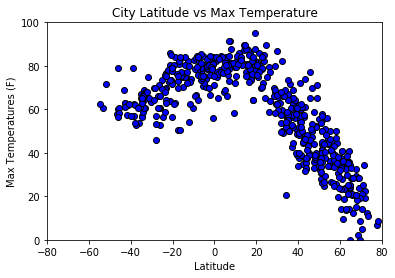

In [62]:
#make the latitude vs temperature scatter plot
latitude = cities_df["Latitude"]
max_temp = cities_df["Max Temp"]
plt.scatter(latitude, max_temp, marker = "o", facecolors = "blue", edgecolors = "black")
plt.xlim(-80, 80)
plt.ylim(0, 100)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (F)")
plt.savefig("City Latitude vs. Max Temperature (April 2020).png")
plt.show()

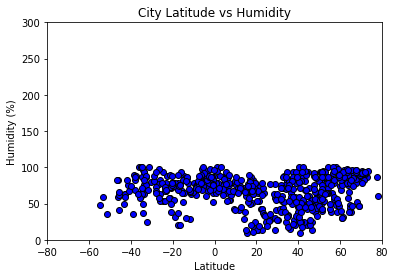

In [63]:
#City latitide vs humidity
latitude = cities_df["Latitude"]
humidity = cities_df["Humidity"]
plt.scatter(latitude, humidity, marker = "o", facecolors = "blue", edgecolors = "black")
plt.xlim(-80, 80)
plt.ylim(0, 300)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("City Latitude vs. Humidity (April 2020).png")
plt.show()

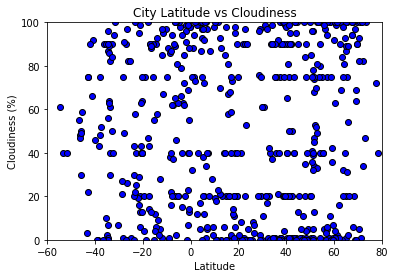

In [64]:
#City latitide vs Cloudiness
latitude = cities_df["Latitude"]
clouds = cities_df["Cloudiness"]
plt.scatter(latitude, clouds, marker = "o", facecolors = "blue", edgecolors = "black")
plt.xlim(-60, 80)
plt.ylim(0, 100)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("City Latitude vs. Cloudiness (April 2020).png")
plt.show()

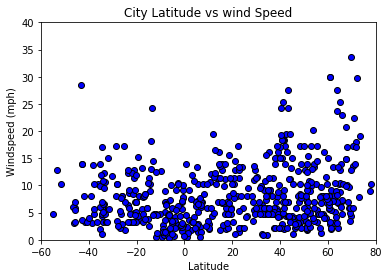

In [65]:
#City latitide vs Wind Speed
latitude = cities_df["Latitude"]
wind_speed = cities_df["Windspeed"]
plt.scatter(latitude, wind_speed, marker = "o", facecolors = "blue", edgecolors = "black")
plt.xlim(-60, 80)
plt.ylim(0, 40)
plt.title("City Latitude vs wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig("City Latitude vs. Wind Speed (April 2020).png")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Linear Regression

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots
## Create Northern and Southern Hemisphere DataFrames
northern_hemis_df = cities_df.loc[(cities_df["Latitude"]) >= 0]
southern_hemis_df = cities_df.loc[(cities_df["Latitude"]) < 0]
southern_hemis_df.head()

,Cities,Max Temp,Humidity,Cloudiness,Country,Date,Windspeed,Longitude,Latitude
2,esperance,64.40,93,40,AU,1586473389,4.70,121.90,-33.87
3,castro,56.37,54,0,BR,1586473220,1.86,-50.01,-24.79
5,new norfolk,63.00,63,75,AU,1586473392,13.87,147.06,-42.78
15,punta arenas,60.80,59,40,CL,1586473406,12.75,-70.92,-53.15
16,rikitea,76.60,68,100,PF,1586473407,8.63,-134.97,-23.12


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.8026235443514709


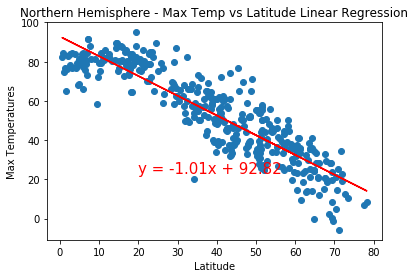

In [53]:
# Make the x and y axis
x_values = northern_hemis_df["Latitude"]
y_values = northern_hemis_df["Max Temp"]

#Find the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#make equation to the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Plot details
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,23),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures")
#print r-squared value
print(f"R-squared: {rvalue ** 2}")

# Save the images
plt.savefig("Northern Hemisphere - Max Temp vs Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.4094551497256952


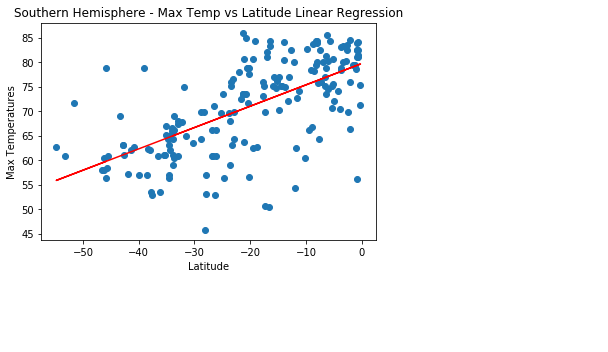

In [54]:
# Make the x and y axis
x_values = southern_hemis_df["Latitude"]
y_values = southern_hemis_df["Max Temp"]

#Find the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#make equation to the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Plot details
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,23),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures")
#print r-squared value
print(f"R-squared: {rvalue ** 2}")
# Save the images
plt.savefig("Southern Hemisphere - Max Temp vs Latitude")
plt.show()
#Analysis
#These graphs both seem to show that the closer the cities are to the equator (0 degrees latitude), the hotter the cities are.
#The graphs also seem to both have some sort of pattern, with the northern cities having a negative slope, while the southern
#cities have a positive slope.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.03194476865356368


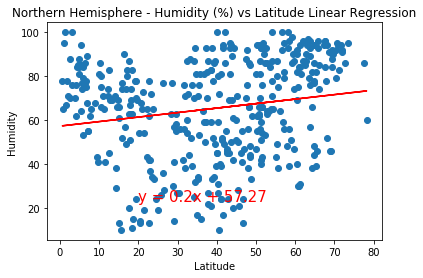

In [55]:
# Make the x and y axis
x_values = northern_hemis_df["Latitude"]
y_values = northern_hemis_df["Humidity"]

#Find the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#make equation to the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Plot details
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,23),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
#print r-squared value
print(f"R-squared: {rvalue ** 2}")
# Save the images
plt.savefig("Northern Hemisphere - Humidity vs Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.05127848028881494


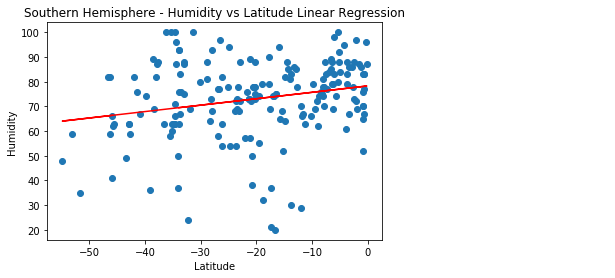

In [56]:
# Make the x and y axis
x_values = southern_hemis_df["Latitude"]
y_values = southern_hemis_df["Humidity"]

#Find the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#make equation to the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Plot details
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,23),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
#print r-squared value
print(f"R-squared: {rvalue ** 2}")
# Save the images
plt.savefig("Southern Hemisphere - Humidity vs Latitude")
plt.show()
#Analysis
# The humidity vs latitude graphs don't seem to have any noticable relationship with each other. Humidity doesn't have really have
# pattern based on the hemisphere of the city.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.006753332211714642


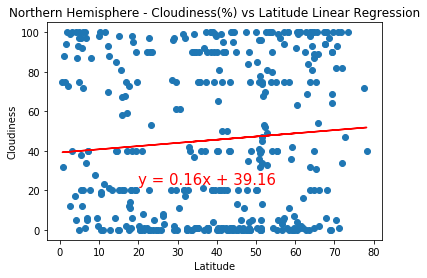

In [57]:
# Make the x and y axis
x_values = northern_hemis_df["Latitude"]
y_values = northern_hemis_df["Cloudiness"]

#Find the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#make equation to the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Plot details
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,23),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness(%) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
#print r-squared value
print(f"R-squared: {rvalue ** 2}")
# Save the images
plt.savefig("Northern Hemisphere - Cloudiness vs Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.01180992084749952


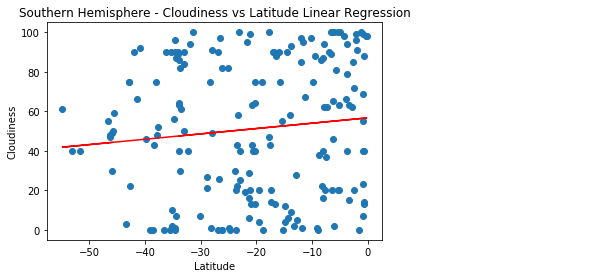

In [59]:
# Make the x and y axis
x_values = southern_hemis_df["Latitude"]
y_values = southern_hemis_df["Cloudiness"]

#Find the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#make equation to the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Plot details
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,23),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
#print r-squared value
print(f"R-squared: {rvalue ** 2}")
# Save the images
plt.savefig("Southern Hemisphere - Cloudiness vs Latitude")
plt.show()
#Analysis
#Just like the humidity, there doesn't seem to be a big relationship correlation between southern and northern cities when it
#comes to cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.050236279845451544


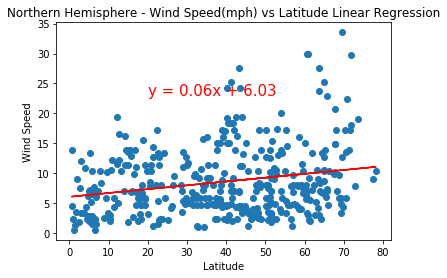

In [60]:
# Make the x and y axis
x_values = northern_hemis_df["Latitude"]
y_values = northern_hemis_df["Windspeed"]

#Find the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#make equation to the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Plot details
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,23),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed(mph) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#print r-squared value
print(f"R-squared: {rvalue ** 2}")
# Save the images
plt.savefig("Northern Hemisphere - Wind Speed vs Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.058392808903303464


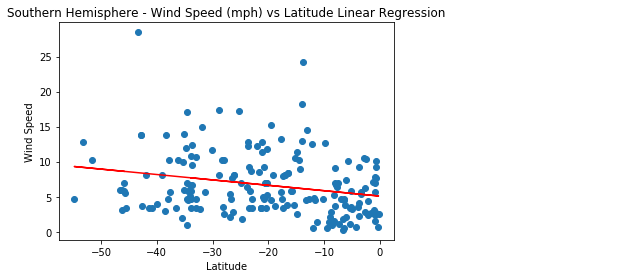

In [61]:
# Make the x and y axis
x_values = southern_hemis_df["Latitude"]
y_values = southern_hemis_df["Windspeed"]

#Find the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#make equation to the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Plot details
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,23),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#print r-squared value
print(f"R-squared: {rvalue ** 2}")
# Save the images
plt.savefig("Southern Hemisphere - Wind Speed vs Latitude")
plt.show()
#Analysis
#The closer to the equator the city is, the less wind it has. This is probably due to the temperature not changing very often.